In [9]:
#!pip install tensorflow  
import tensorflow as tf
print(tf.__version__)
from __future__ import absolute_import,division,print_function,unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib


2.11.0


In [17]:
TF_Model='PIDmodel.tflite'
interp=tf.lite.Interpreter(model_path=TF_Model)
classify_lite=interp.get_signature_runner('serving_default')


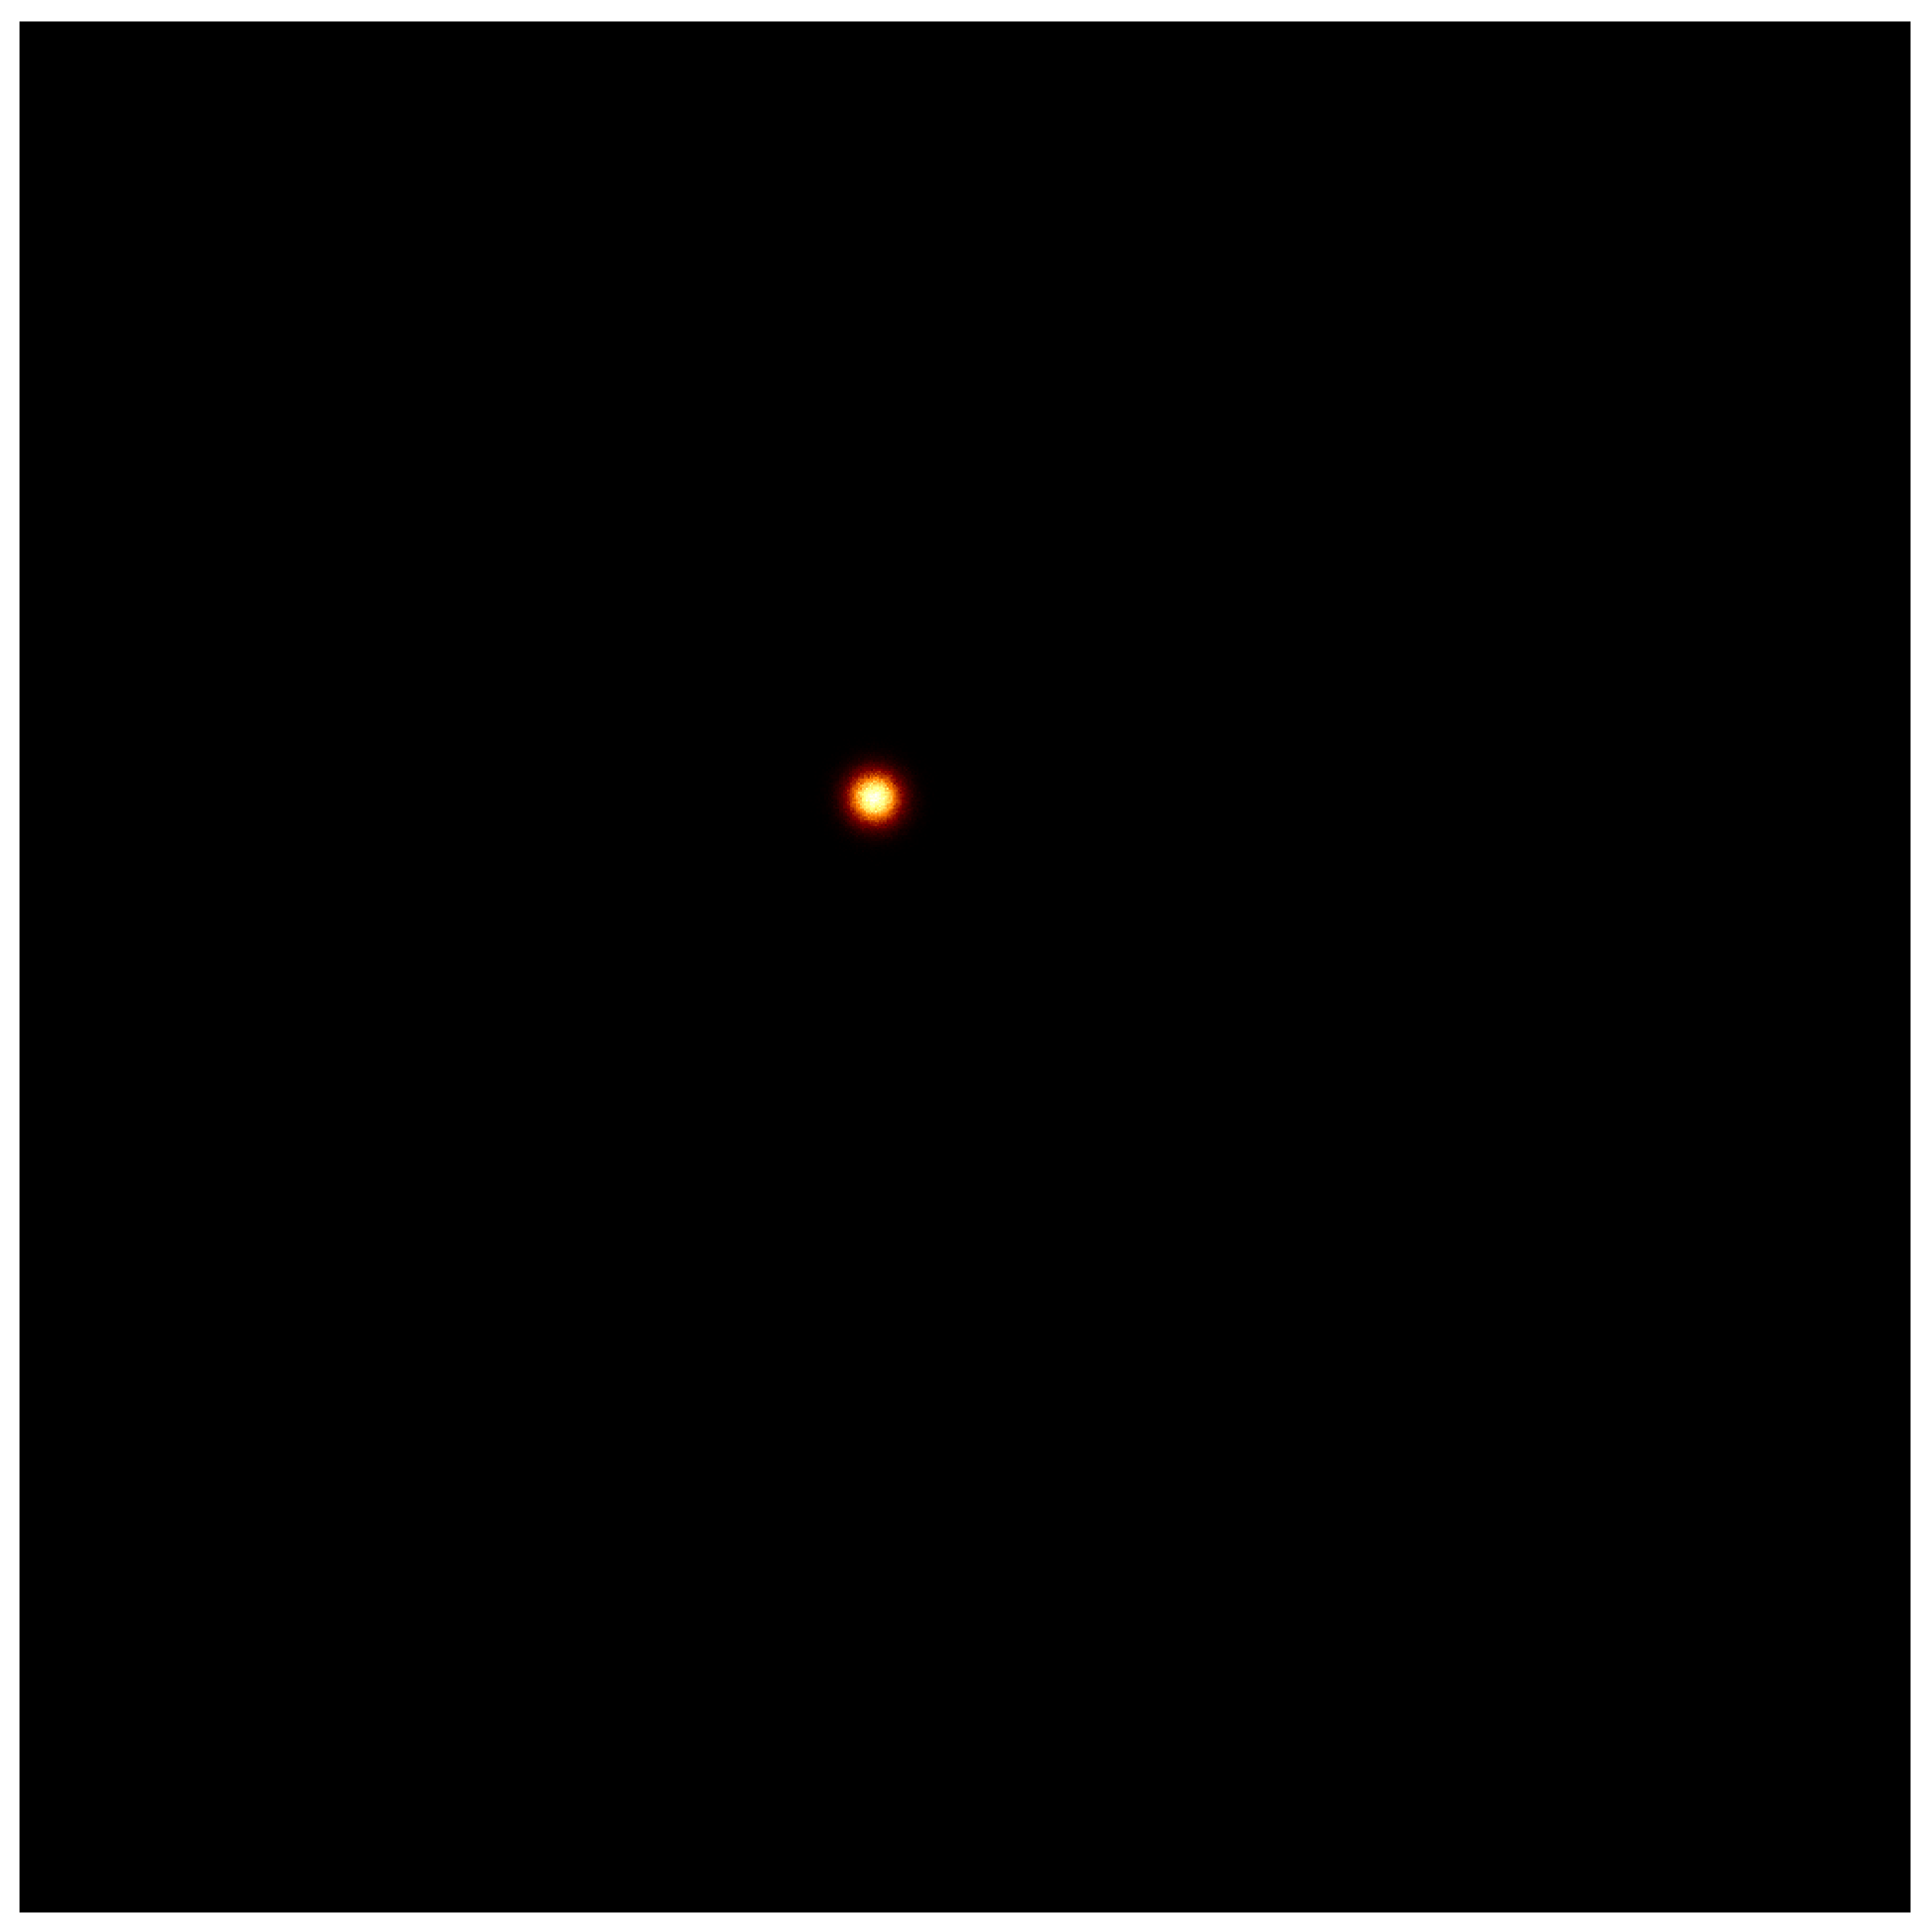

In [11]:
Predict_Alpha=pathlib.Path("/media/ilker/Ilker/SimResults/Jan_20_2022/Predictions")
alphas=list(Predict_Alpha.glob('Alpha/*'))
betas=list(Predict_Alpha.glob('Beta/*'))

PIL.Image.open(str(alphas[0]))

1
This image most likely belongs to Betas with a 100.00 percent confidence.


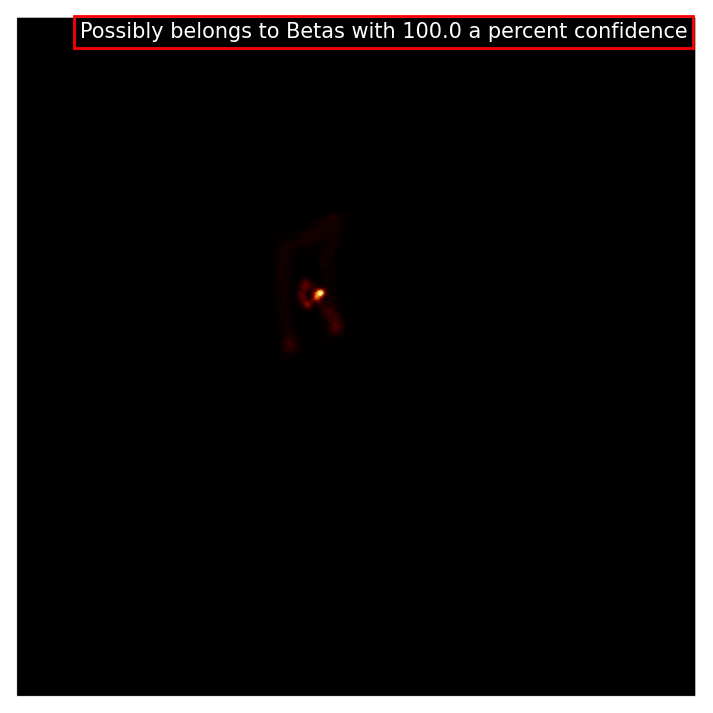

In [22]:
### Predictions
testedimg=betas[1]
img=tf.keras.utils.load_img(
    testedimg,target_size=(180,180)
)
img_array=tf.keras.utils.img_to_array(img)
img_array=tf.expand_dims(img_array,0) ### Create a batch
predictions_lite = classify_lite(sequential_1_input=img_array)['output']
score_lite = tf.nn.softmax(predictions_lite)

class_names=["Alphas","Betas"]

print(np.argmax(score_lite))
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score_lite)],100*np.max(score_lite))
)
k=plt.imread(testedimg)
fig,ax=plt.subplots(figsize=(9,9))

plt.axis("off")
s="Possibly belongs to " + class_names[np.argmax(score_lite)] +" with " + str(round(100*np.max(score_lite),2))+ " a percent confidence"
plt.text(300,120,s,fontsize=15,color="white",bbox=dict(fill=False, edgecolor='red',linewidth=2))
im=ax.imshow(k)
